In [10]:
import cv2
import numpy as np
from scipy import ndimage

qrDecoder = cv2.QRCodeDetector()
im = cv2.imread('imgs/test qr.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im2 = ndimage.median_filter(im,size=3)
myqr = qrDecoder.detectAndDecode(im2)
myqr 

('Halo LPDP',
 array([[[ 33.,  31.],
         [325.,  31.],
         [325., 324.],
         [ 33., 324.]]], dtype=float32),
 array([[  0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255,
           0, 255,   0, 255,   0, 255,   0,   0, 255,   0,   0,   0,   0,
           0,   0,   0],
        [  0, 255, 255, 255, 255, 255,   0, 255,   0, 255, 255, 255,   0,
           0, 255,   0,   0, 255, 255, 255,   0, 255,   0, 255, 255, 255,
         255, 255,   0],
        [  0, 255,   0,   0,   0, 255,   0, 255,   0,   0,   0, 255, 255,
         255,   0, 255,   0,   0, 255,   0,   0, 255,   0, 255,   0,   0,
           0, 255,   0],
        [  0, 255,   0,   0,   0, 255,   0, 255,   0, 255,   0,   0, 255,
           0,   0,   0, 255, 255, 255, 255, 255, 255,   0, 255,   0,   0,
           0, 255,   0],
        [  0, 255,   0,   0,   0, 255,   0, 255,   0,   0,   0, 255,   0,
         255, 255, 255, 255, 255, 255,   0, 255, 255,   0, 255,   0,   0,
           0, 255,   0],
        [  

In [11]:
top = myqr[1][0][0].astype(int)
bottom = myqr[1][0][2].astype(int)+1
top, bottom

(array([33, 31]), array([326, 325]))

In [12]:
qim = im2[top[0]:bottom[0],top[1]:bottom[1]]
print(qim.shape)

(293, 294)


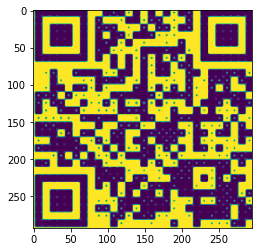

In [13]:
import matplotlib.pyplot as plt
plt.imshow(qim)

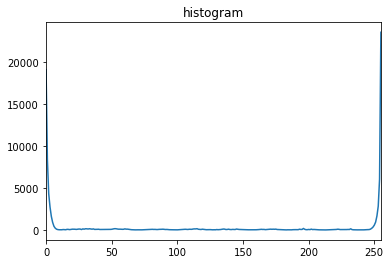

In [14]:
hist,bin = np.histogram(qim.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')

plt.show()

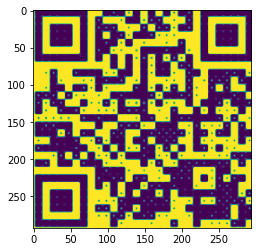

In [40]:
from scipy import ndimage
im2 = ndimage.median_filter(qim,size=3)
plt.imshow(im2)

In [36]:
import numpy as np
qr = np.zeros((29,29))

for y in range(29):
    for x in range(29):
        qr[y,x] = np.median(qim[y*10:(y+1)*10,x*10:(x+1)*10])

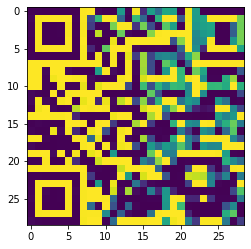

In [37]:
plt.imshow(qr)

In [3]:
data="halo99"
seq="0000000100100011000111000000001111101110100011101110111110010001011010111110001101000100100010101110101000101010001001000101110000101101010100010011111011101001000100101111100000000101010101010101000000011111111100110101000111111111110100010101010111011011101100001111111000000110011101010010000101100110111001111000100111011111011000001101110110010111010110100000110101001011010110110000011110110001010111011101011100101010000010000011011011010110101010100000110100000000000001110100001100110100101110101111110100011010000101100100001010110000111100010111110001101110001000101100010001010000110001000000010101111111100111111010101110000100000001110011110111010101001011111010101010111100111011000100010101010000010100000111001000101101100001101110100101010001010010110010010101000100111110110100110000110110101100000001100100100111000011100"
dots="0000000100101010100011000000001111101000110011001110111110010001011110110100111101000100100010100001111111001010001001000101111101111010010100010011111010111100001010101111100000000100100010001101000000011111111111111011111111111111000000110011111000001101000000100010001000000101010100111010101010001000110011001111101101001110000111111100111101111010001111000010100010001000110111111011111100000011001111100000110100000010001000100000010101010011101010101000100011001100111110110100111000011111110011110111101000111100001010001000100011011111101111110000001100111110000011010000001000100010000001010101001111111111101010101000100011001100000001001111101101001110000011111011111111001111011110100100010100111100001010001000101000101000110111111011111100010001010000110011111000001100111110110000001000100010000000000001010101010011101010101"

In [5]:
import secureqr
secureqr.percentage_matching(data,seq,dots,version=3)

100.0